# Part 01: Intro to TensorFlow



In this practice assignment, you'll get exposure to using TensorFlow and learn how it can be used for solving deep learning tasks. Go through the code and run each cell. Along the way, you'll encounter several ***TODO*** blocks -- follow the instructions to fill them out before running those cells and continuing.




## 1.1 Intro to TensorFlow



TensorFlow is a software library extensively used in machine learning. Here we'll learn how computations are represented and how to define a simple neural network in TensorFlow. We'll be using the latest version of TensorFlow, TensorFlow 2, which affords great flexibility and the ability to imperatively execute operations, just like in Python. You'll notice that TensorFlow 2 is quite similar to Python in its syntax and imperative execution. Let's install TensorFlow and a couple of dependencies.


In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.3.0'

## 1.2 Why is TensorFlow called TensorFlow?



TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The ```shape``` of a Tensor defines its number of dimensions and the size of each dimension. The ```rank``` of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

Let's first look at 0-d Tensors, of which a scalar is an example:

In [ ]:
place = tf.constant("IMD", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`place` is a {}-d Tensor".format(tf.rank(place).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`place` is a 0-d Tensor
`number` is a 0-d Tensor


Vectors and lists can be used to create 1-d Tensors:

In [ ]:
places = tf.constant(["IMD", "nPITI"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`places` is a {}-d Tensor with shape: {}".format(tf.rank(places).numpy(), tf.shape(places)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`places` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


Next we consider creating 2-d (i.e., matrices) and higher-rank Tensors. For examples, in latter practice involving image processing and computer vision, we will use 4-d Tensors. Here the dimensions correspond to the number of example images in our batch, image height, image width, and the number of color channels.

In [ ]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor using tf.constant'''
# matrix = # TODO

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [ ]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3. 
#   You can think of this as 10 images where each image is RGB 256 x 256.

# images = # TODO

assert isinstance(images, tf.Tensor), "images must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "images must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

As you have seen, the ```shape``` of a Tensor provides the number of elements in each Tensor dimension. The ```shape``` is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank Tensor:

In [ ]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [5. 6. 7. 8.]
`column_vector`: [3. 7.]
`scalar`: 7.0


## 1.3 Computations on Tensors



A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a simple example, and define this computation using TensorFlow:


<center><img width="600" src="https://drive.google.com/uc?export=view&id=1fOnxmc49llQqf7jadUwBSPUujWld2Cnf"></center>



In [ ]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how  the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:


<center><img width="500" src="https://drive.google.com/uc?export=view&id=1IB2tVNOee1VmDjgqzSXiwXb1Ap03-6rl"></center>

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [ ]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  # c = # TODO
  # d = # TODO
  # e = # TODO
  return e

Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [ ]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

## 1.4 Neural networks in TensorFlow



We can also define neural networks in TensorFlow. TensorFlow uses a high-level API called [Keras](https://www.tensorflow.org/guide/keras) that provides a powerful, intuitive framework for building and training deep learning models.

Let's first consider the example of a simple perceptron defined by just one dense layer: $ y = \sigma(Wx + b)$, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output. We can also visualize this operation using a graph: 

<center><img width="800" src="https://drive.google.com/uc?export=view&id=15MDfSLLdfXt656lQr15QDQyTK6hjhVk1"></center>


Tensors can flow through abstract types called [```Layers```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) -- the building blocks of neural networks. ```Layers``` implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity. We will first define a ```Layer``` to implement the simple perceptron defined above.

In [ ]:
### Defining a network Layer ###

# units: number of hidden units (number of neurons)
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, units=32):
    super(OurDenseLayer, self).__init__()
    self.units = units

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", 
                             shape=[d,self.units],  # note the dimensionality
                             initializer='random_normal')
    self.b = self.add_weight("bias",
                             shape=[1,self.units], # note the dimensionality
                             initializer='zeros') 

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    # z = # TODO

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    # y = # TODO
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)

# The layer has three hidden units or three neurons
layer = OurDenseLayer(3)

# One instance with two features
x_input = tf.ones((1,2))

# 'build' >> 'call' 
y = layer(x_input)

# test the output!
print(y.numpy())

[[0.47525924 0.5040134  0.4925321 ]]


In [ ]:
layer.weights

[<tf.Variable 'our_dense_layer_2/weight:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.05506101,  0.07728758,  0.0191822 ],
        [-0.04398289, -0.06123361, -0.04905606]], dtype=float32)>,
 <tf.Variable 'our_dense_layer_2/bias:0' shape=(1, 3) dtype=float32, numpy=array([[0., 0., 0.]], dtype=float32)>]

In [ ]:
x_input

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 1.]], dtype=float32)>

In [ ]:
tf.sigmoid(tf.matmul(x_input,layer.weights[0]))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.47525924, 0.5040134 , 0.4925321 ]], dtype=float32)>

**Expected Output**
```python
[[0.47525924 0.5040134  0.4925321 ]]
```


Conveniently, TensorFlow has defined a number of ```Layers``` that are commonly used in neural networks, for example a [```Dense```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable). Now, instead of using a single ```Layer``` to define our simple neural network, we'll use the  [`Sequential`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) model from Keras and a single [`Dense` ](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) layer to define our network. With the `Sequential` API, you can readily create neural networks by stacking together layers like building blocks. 

In [ ]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(1)

# Define the number of units
units = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: In this exercise provide only the number of units, activation function as sigmoid
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable

# dense_layer = Dense(None, 
#                     activation=None,
#                     kernel_initializer=tf.constant_initializer(layer.weights[0].numpy())) # TODO


# Add the dense layer to the model
model.add(dense_layer)

That's it! We've defined our model using the Sequential API. Now, we can test it out using an example input:

In [ ]:
# Test model with example input
x_input_ = tf.ones((1,2))

'''TODO: feed input into the model and predict the output!'''
# model_output = # TODO
print(model_output.numpy())

[[0.47525924 0.5040134  0.4925321 ]]


In addition to defining models using the `Sequential` API, we can also define neural networks by directly subclassing the [`Model`](https://https://www.tensorflow.org/api_docs/python/tf/keras/Model?version=stable) class, which groups layers together to enable model training and inference. The `Model` class captures what we refer to as a "model" or as a "network". Using Subclassing, we can create a class for our model, and then define the forward pass through the network using the `call` function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions, and custom models. Let's define the same neural network as above now using Subclassing rather than the `Sequential` model.

In [ ]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, units):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.''' 
    
    # self.dense_layer = Dense(None, 
    #                          activation=None,
    #                          kernel_initializer=tf.constant_initializer(layer.weights[0].numpy())) # TODO

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)

Just like the model we built using the `Sequential` API, let's test out our `SubclassModel` using an example input.



In [ ]:
tf.random.set_seed(1)

units = 3
model = SubclassModel(units)

x_input_ = tf.ones((1,2))

print(model(x_input_))

tf.Tensor([[0.47525924 0.5040134  0.4925321 ]], shape=(1, 3), dtype=float32)


Importantly, Subclassing affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the `call` function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument `isidentity` to control this behavior:

In [ ]:
### Defining a model using subclassing and specifying custom behavior ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

tf.random.set_seed(1)

class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
  def __init__(self, units):
    super(IdentityModel, self).__init__()
    self.dense_layer = Dense(units, 
                             activation='sigmoid',
                             kernel_initializer='random_uniform') # TODO

  '''TODO: Implement the behavior where the network outputs the input, unchanged, under control of the isidentity argument.'''
  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity: 
      return inputs
    return x
  

Let's test this behavior:

In [ ]:
units = 3
model = IdentityModel(units)

x_input_ = tf.ones((1,2))

'''TODO: pass the input into the model and call with and without the input identity option.'''
# out_activate = # TODO
# out_identity = # TODO

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.51256233 0.50330484 0.4938599 ]]; network identity output: [[1. 1.]]


Now that we have learned how to define `Layers` as well as neural networks in TensorFlow using both the `Sequential` and Subclassing APIs, we're ready to turn our attention to how to actually implement network training with backpropagation.

## 1.5 Automatic differentiation in TensorFlow

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)
is one of the most important parts of TensorFlow and is the backbone of training with 
[backpropagation](https://en.wikipedia.org/wiki/Backpropagation). We will use the TensorFlow GradientTape [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape?version=stable) to trace operations for computing gradients later. 

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular `tf.GradientTape` can only
compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a ```persistent``` gradient tape. 

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function $ y = x^2$ and compute the gradient:

In [ ]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how `GradientTape` can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $L=(x-x_f)^2$. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to  minimize. While we can clearly solve this problem analytically ($x_{min}=x_f$), considering how we can compute this using `GradientTape` sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=[[-0.45701224]]


Text(0, 0.5, 'x value')

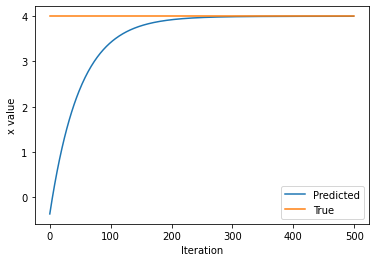

In [ ]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    # loss = # TODO  (hint: L = (x - xf)^2)

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

`GradientTape` provides an extremely flexible framework for automatic differentiation. In order to back propagate errors through a neural network, we track forward passes on the Tape, use this information to determine the gradients, and then use these gradients for optimization using SGD.

# Part 02: End to End Project

## 2.1 Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time

## 2.2 Utils functions

In [3]:
def load_dataset():
    # load the train data
    train_dataset = h5py.File('train_catvnoncat.h5', "r")

    # your train set features
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 

    # your train set labels
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    
    # load the test data
    test_dataset = h5py.File('test_catvnoncat.h5', "r")

    # your test set features
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 

    # your test set labels  
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    # the list of classes
    classes = np.array(test_dataset["list_classes"][:]) 

    # reshape the test data
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0],1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## 2.3 Load Dataset

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [5]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

# Standardize the dataset
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [6]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x  shape: " + str(test_set_x.shape))
print ("test_set_y  shape: " + str(test_set_y.shape))

train_set_x shape: (209, 12288)
train_set_y shape: (209, 1)
test_set_x  shape: (50, 12288)
test_set_y  shape: (50, 1)


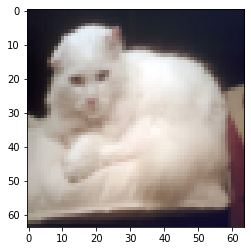

In [7]:
# visualize a sample data
index = 13
plt.imshow(train_set_x_orig[index])

## 2.4 Model

In [8]:
# Create a source dataset from your training data
dataset = tf.data.Dataset.from_tensor_slices((train_set_x,train_set_y))
dataset = dataset.shuffle(buffer_size=64).batch(32)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(8, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, dtype='float64')
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [9]:
for i in range(500):    
    # Iterate over the batches of the dataset.
    for step, (x, y) in enumerate(dataset):
      # Open a GradientTape.
      with tf.GradientTape() as tape:

        # Forward pass.
        logits = model(x)

        # Loss value for this batch.
        loss_value = loss(y, logits)
          
      # Get gradients of loss wrt the weights.
      gradients = tape.gradient(loss_value, model.trainable_weights)

      # Update the weights of our linear layer.
      optimizer.apply_gradients(zip(gradients, model.trainable_weights))

      # Update the running accuracy.
      accuracy.update_state(y, logits)

    # Logging.
    if i % 100 == 0:
      print('epoch:', i)
      print('Loss from last step: %.3f' % loss_value)
      print('Total running accuracy so far: %.3f' % accuracy.result())

epoch: 0
Loss from last step: 0.710
Total running accuracy so far: 0.354
epoch: 100
Loss from last step: 0.675
Total running accuracy so far: 0.665
epoch: 200
Loss from last step: 0.387
Total running accuracy so far: 0.705
epoch: 300
Loss from last step: 0.333
Total running accuracy so far: 0.762
epoch: 400
Loss from last step: 0.177
Total running accuracy so far: 0.809


In [10]:
# Create a source dataset from your test data
test_dataset = tf.data.Dataset.from_tensor_slices((test_set_x, test_set_y))
test_dataset = test_dataset.batch(32)

# This clears the internal state of the metric
accuracy.reset_states()  

for step, (x, y) in enumerate(test_dataset):
  logits = model(x)
  accuracy.update_state(y, logits)

print('Final test accuracy: %.3f' % accuracy.result())

Final test accuracy: 0.820


## 2.5 Exercise

This exercise consists of the experimentation regarding the Cat vs Non-Cat model previously presented.

1. Evaluate the performance of the model (train and test) considering a different range of layers (1, 3, and 4) and units dimensions (16,32,64)
2. Experiment with other optimizers and evaluate different learning rate values (0.001, 0.01, 0.1, 1). What happens?
3. Has the size of mini-batch a huge influence under results? Make some experiments to support your findings. 
4. Consider this [reference](https://www.deeplearning.ai/ai-notes/optimization/) and investigate different evaluation scenarios under the hyperparameter search. 
5. Elaborate a short technical note at Medium about your conclusions regarding questions 1, 2, 3, and 4. Reproducibility, clarity, and objectivity are one of the most critical metrics for the readers.   